<a href="https://www.kaggle.com/code/arnabmukherjee853/flight-cost-analysis?scriptVersionId=196675442" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-booking-information/Flight_Booking.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/flight-booking-information/Flight_Booking.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df=df.drop(columns=['Unnamed: 0'])

In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df['days_left']=df['days_left'].astype('O')

In [9]:
df.describe()

,duration,price
count,300153.000000,300153.000000
mean,12.221021,20889.660523
std,7.191997,22697.767366
min,0.830000,1105.000000
25%,6.830000,4783.000000
50%,11.250000,7425.000000
75%,16.170000,42521.000000
max,49.830000,123071.000000


In [10]:
df.isna().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [11]:
df=df.drop(columns=['flight'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  object 
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 22.9+ MB


**Data Visualization**

<Axes: >

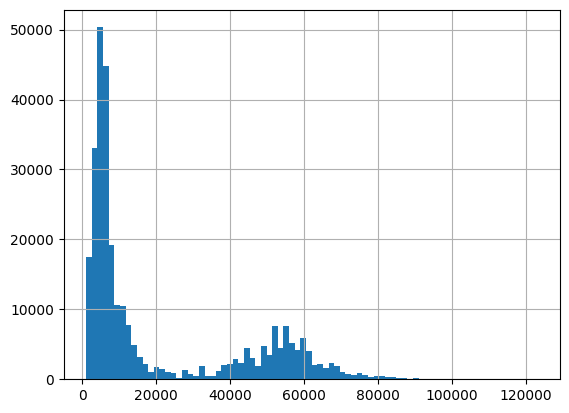

In [13]:
df.price.hist(bins=80)

In [14]:
airline_Price=df.groupby(['airline'])['price'].mean().reset_index()
airline_Price

,airline,price
0,AirAsia,4091.072742
1,Air_India,23507.019112
2,GO_FIRST,5652.007595
3,Indigo,5324.216303
4,SpiceJet,6179.278881
5,Vistara,30396.536302


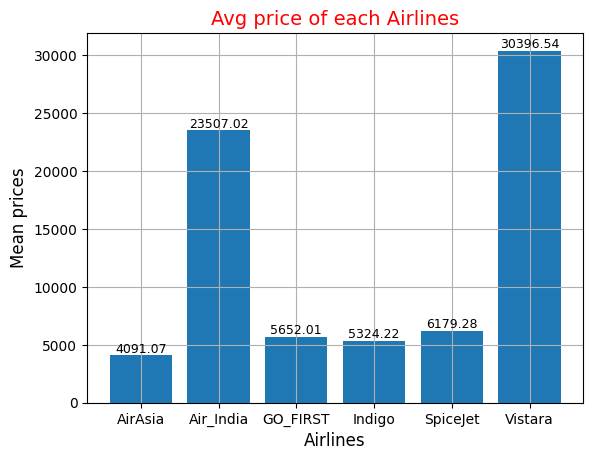

In [15]:
plt.bar(airline_Price['airline'],airline_Price['price'])
plt.title('Avg price of each Airlines',fontsize=14,color='red')
plt.xlabel('Airlines',fontsize=12)
plt.ylabel('Mean prices',fontsize=12)
plt.grid(True)
for index, value in enumerate(airline_Price['price']):
    plt.text(index,value,f'{value:.2f}',ha='center',va='bottom',fontsize=9)
plt.show()

In [16]:
df.sample(7)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
204739,Indigo,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.00,28,1551
164666,GO_FIRST,Hyderabad,Early_Morning,one,Afternoon,Mumbai,Economy,6.33,43,4165
44259,GO_FIRST,Mumbai,Afternoon,one,Night,Delhi,Economy,5.00,9,5942
155798,AirAsia,Hyderabad,Evening,one,Morning,Delhi,Economy,13.17,29,4213
12503,AirAsia,Delhi,Morning,one,Evening,Bangalore,Economy,7.42,15,3090
70688,Vistara,Mumbai,Night,one,Evening,Hyderabad,Economy,20.08,4,10058
143287,Vistara,Kolkata,Evening,one,Early_Morning,Hyderabad,Economy,14.25,9,12880


In [17]:
airline_price_time=df.groupby(['departure_time'])['price'].mean().reset_index()
airline_price_time

,departure_time,price
0,Afternoon,18179.203331
1,Early_Morning,20370.676718
2,Evening,21232.361894
3,Late_Night,9295.299387
4,Morning,21630.760254
5,Night,23062.146808


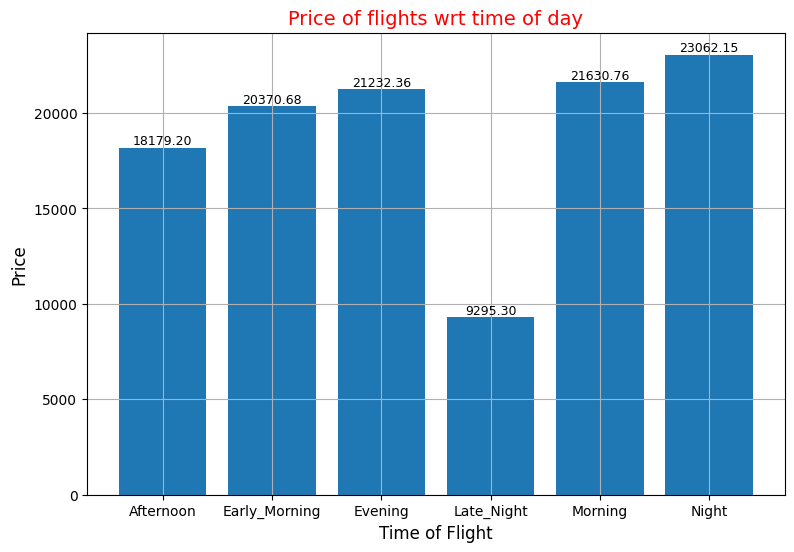

In [18]:
plt.figure(figsize=(9,6))
plt.bar(airline_price_time['departure_time'],airline_price_time['price'])
plt.title('Price of flights wrt time of day',fontsize=14,color='red')
plt.xlabel('Time of Flight',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.grid('True')
for i,v in enumerate(airline_price_time['price']):
    plt.text(i,v,f'{v:.2f}',ha='center',va='bottom',fontsize=9)
plt.show()

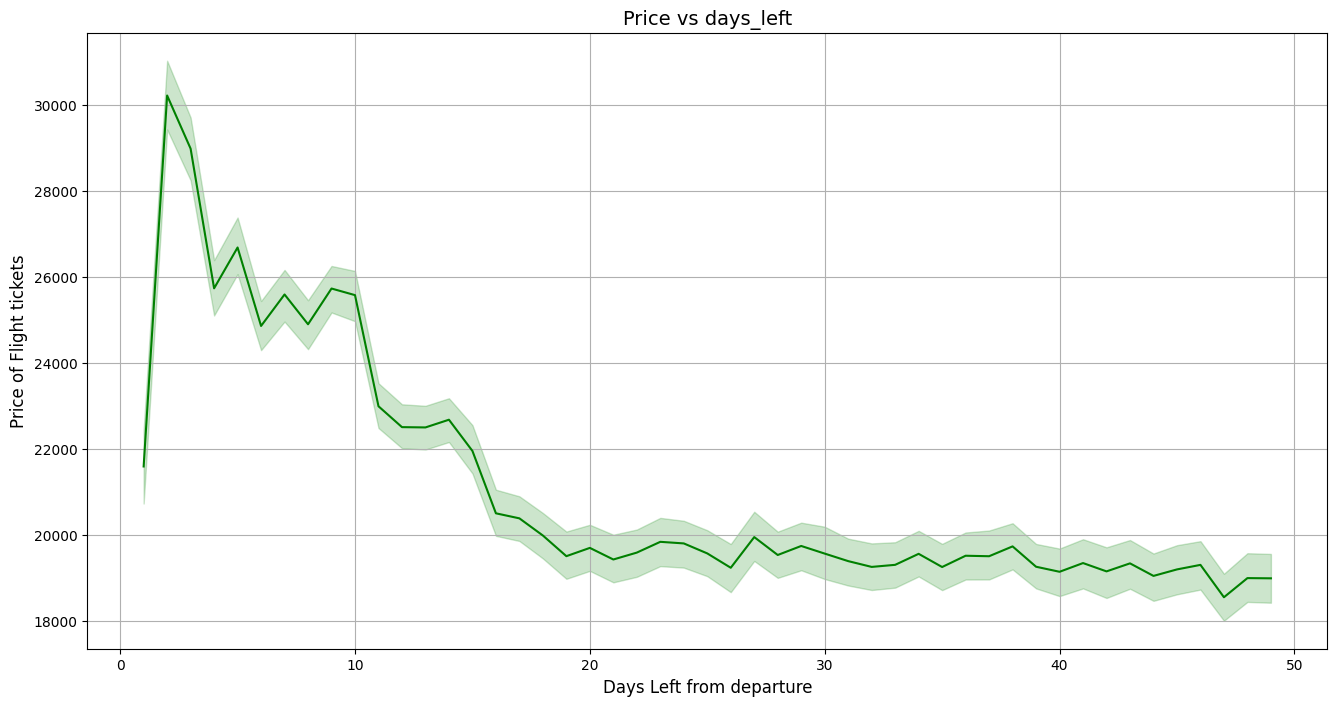

In [19]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df,x=df['days_left'],y=df['price'],color='green')
plt.title('Price vs days_left',fontsize=14)
plt.xlabel('Days Left from departure',fontsize=12)
plt.ylabel('Price of Flight tickets',fontsize=12)
plt.grid(True)

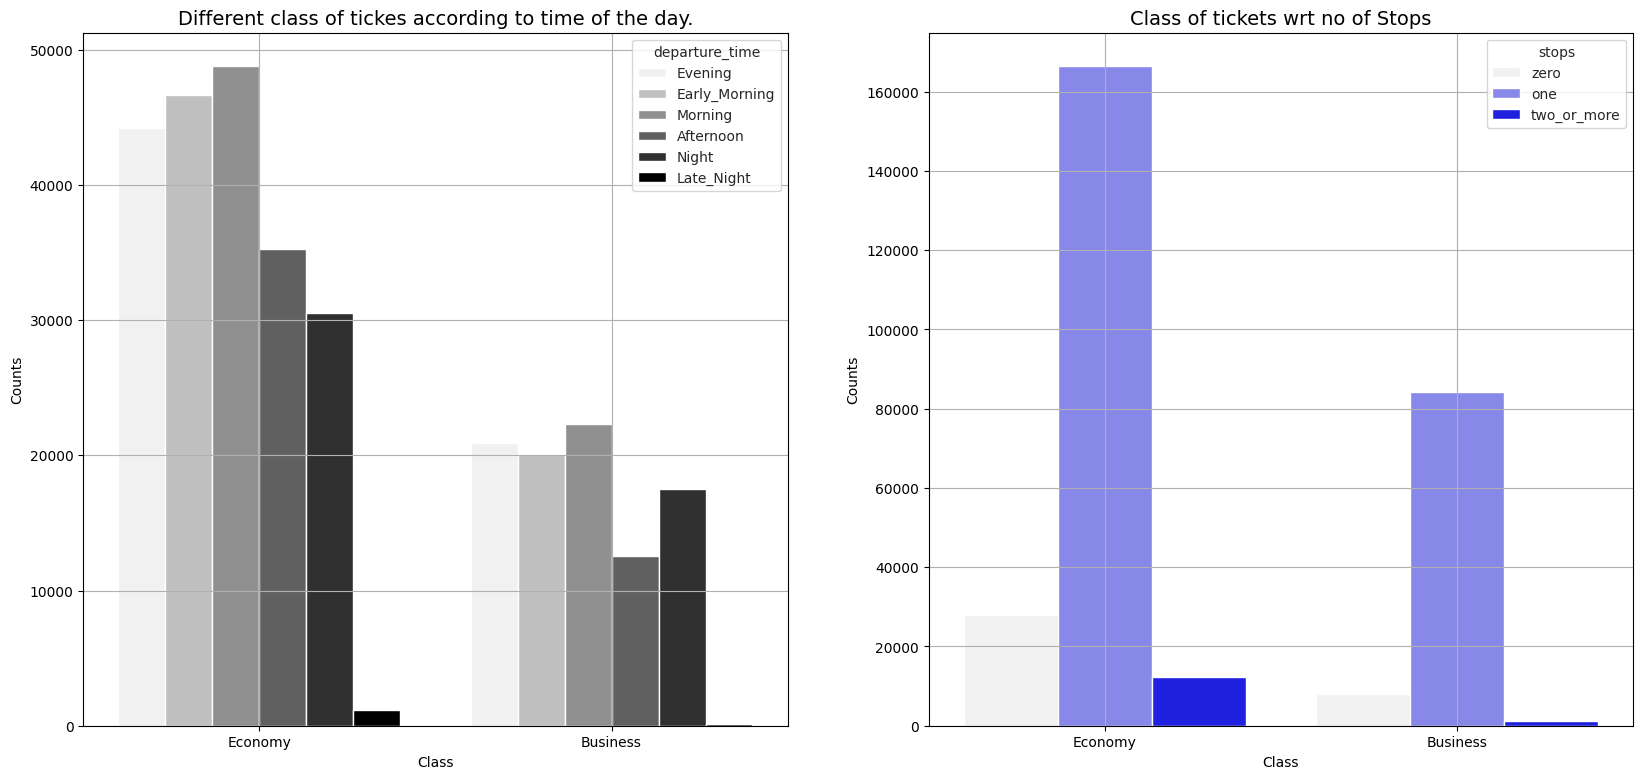

In [20]:
fig,(ax,ax1)=plt.subplots(ncols=2,figsize=(20,9))
sns.set_style('ticks')
sns.countplot(data=df,x=df['class'],hue='departure_time',color='black',ax=ax)
ax.set_xlabel('Class')
ax.set_ylabel('Counts')
ax.set_title('Different class of tickes according to time of the day.',fontsize=14)
ax.grid(True)
sns.countplot(data=df,x=df['class'],hue='stops',color='blue',ax=ax1)
ax1.set_xlabel('Class')
ax1.set_ylabel('Counts')
ax1.set_title('Class of tickets wrt no of Stops',fontsize=14)
plt.grid(True)

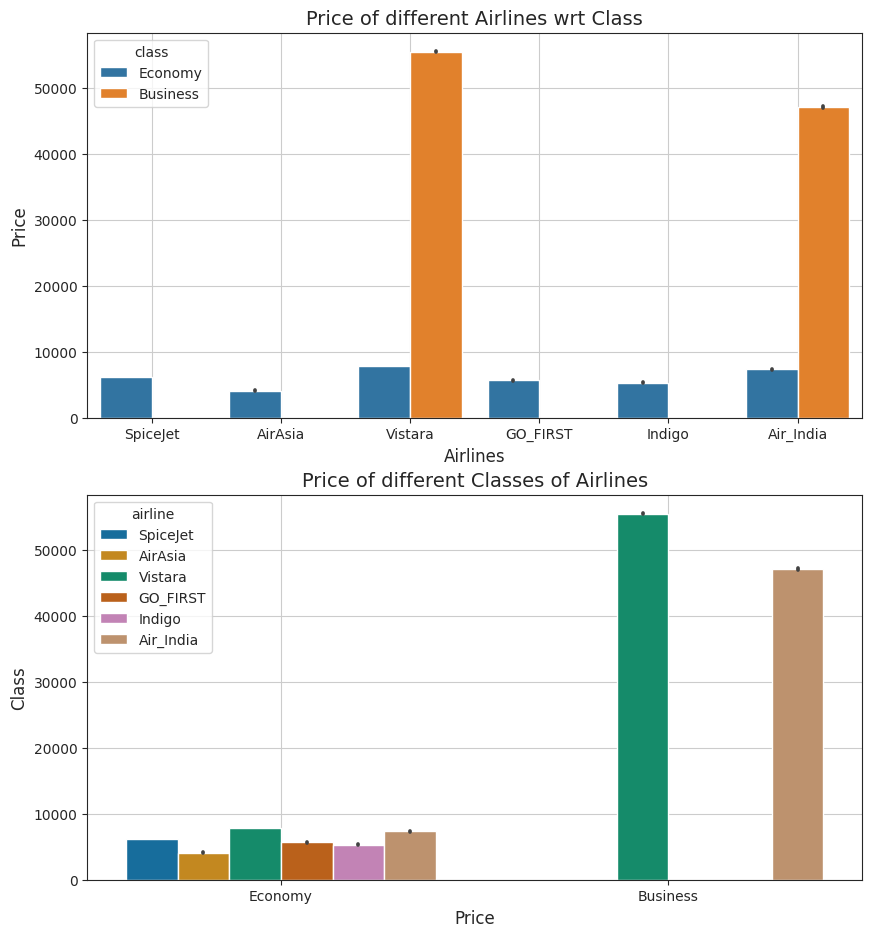

In [21]:
fig,(ax,ax1)=plt.subplots(nrows=2,figsize=(10,11))
color_airline = sns.color_palette(as_cmap=True)
color_class = sns.color_palette('colorblind')
sns.barplot(data=df,x=df['airline'],y=df['price'],hue='class',ax=ax, palette=color_airline)
sns.barplot(data=df,x=df['class'],y=df['price'],hue='airline',ax=ax1,palette=color_class)
ax.set_xlabel('Airlines',fontsize=12)
ax1.set_xlabel('Price',fontsize=12)
ax.set_ylabel('Price',fontsize=12)
ax1.set_ylabel('Class',fontsize=12)
ax.set_title('Price of different Airlines wrt Class',fontsize=14)
ax1.set_title('Price of different Classes of Airlines',fontsize=14)
ax.grid(True)
ax1.grid(True)
plt.show()

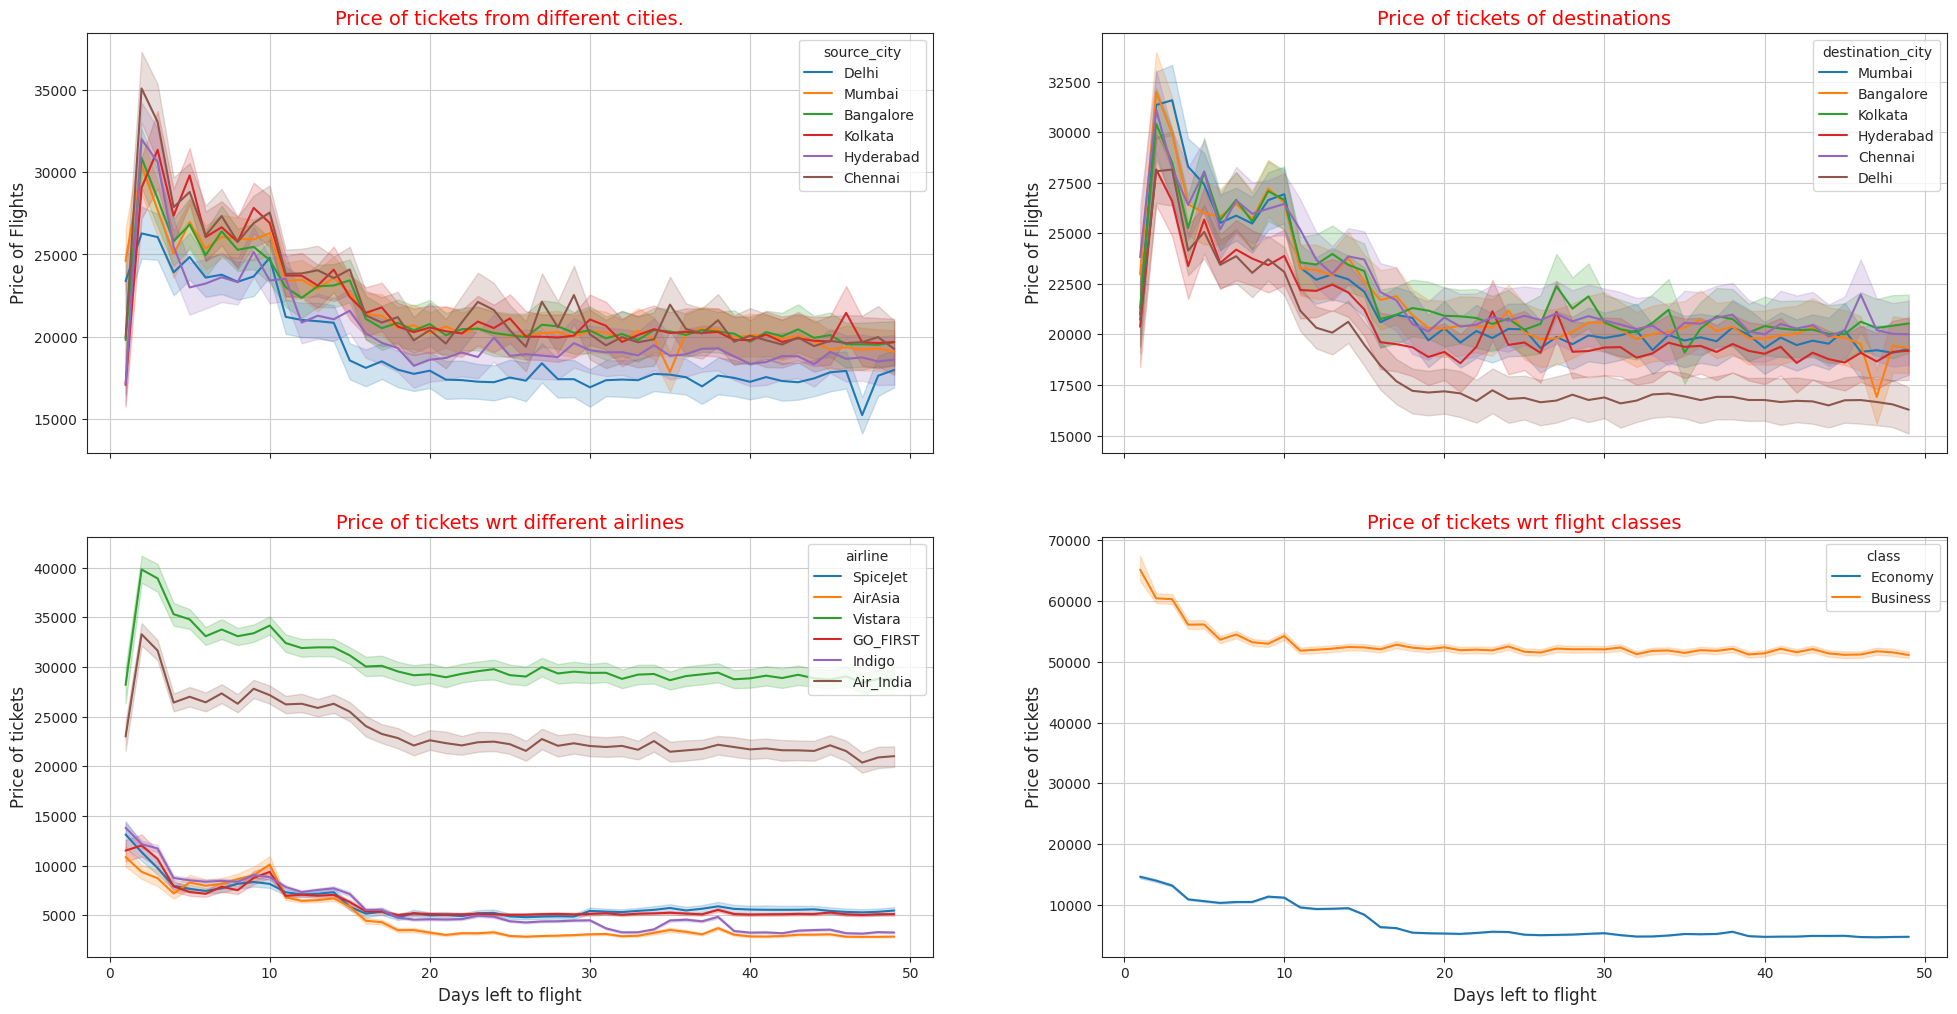

In [22]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(24,12),sharex=True)
sns.lineplot(data=df,ax=axs[0,0],x=df['days_left'],y=df['price'],hue='source_city')
sns.lineplot(data=df,ax=axs[0,1],x=df['days_left'],y=df['price'],hue='destination_city')
sns.lineplot(data=df,ax=axs[1,0],x=df['days_left'],y=df['price'],hue='airline')
sns.lineplot(data=df,ax=axs[1,1],x=df['days_left'],y=df['price'],hue='class')
axs[0,0].set_title('Price of tickets from different cities.',fontsize=14,color='red')
axs[0,1].set_title('Price of tickets of destinations',fontsize=14,color='red')
axs[1,0].set_title('Price of tickets wrt different airlines',fontsize=14,color='red')
axs[1,1].set_title('Price of tickets wrt flight classes',fontsize=14,color='red')
axs[0,0].set_xlabel('Days left to Flight',fontsize=12)
axs[0,1].set_xlabel('Days left to Flight',fontsize=12)
axs[1,0].set_xlabel('Days left to flight',fontsize=12)
axs[1,1].set_xlabel('Days left to flight',fontsize=12)
axs[0,0].set_ylabel('Price of Flights',fontsize=12)
axs[0,1].set_ylabel('Price of Flights',fontsize=12)
axs[1,0].set_ylabel('Price of tickets',fontsize=12)
axs[1,1].set_ylabel('Price of tickets',fontsize=12)
axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)

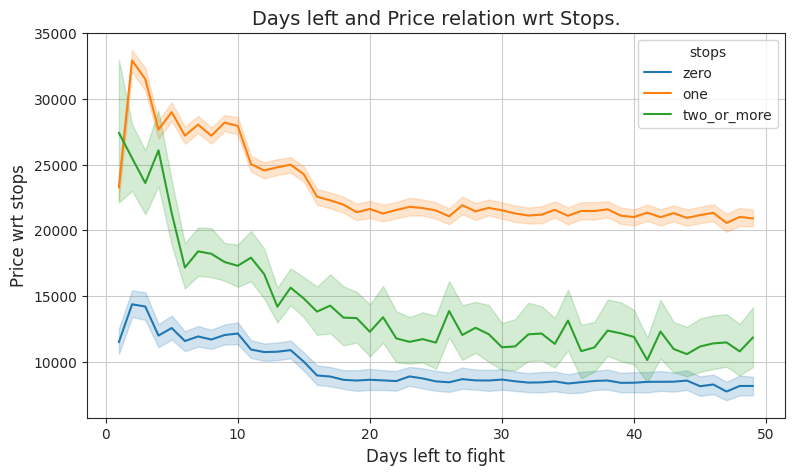

In [23]:
fig,ax=plt.subplots(figsize=(9,5))
sns.lineplot(data=df,ax=ax,x=df['days_left'],y=df['price'],hue=df['stops'])
ax.set_title('Days left and Price relation wrt Stops.',fontsize=14)
ax.set_xlabel('Days left to fight',fontsize=12)
ax.set_ylabel('Price wrt stops',fontsize=12)
plt.grid(True)

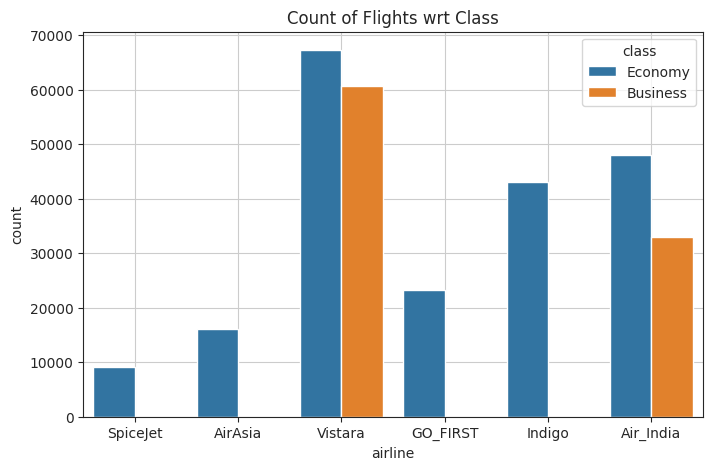

In [24]:
plt.figure(figsize =(8,5))
sns.countplot(data=df,x=df['airline'],hue='class')
plt.title('Count of Flights wrt Class')
plt.grid(True)

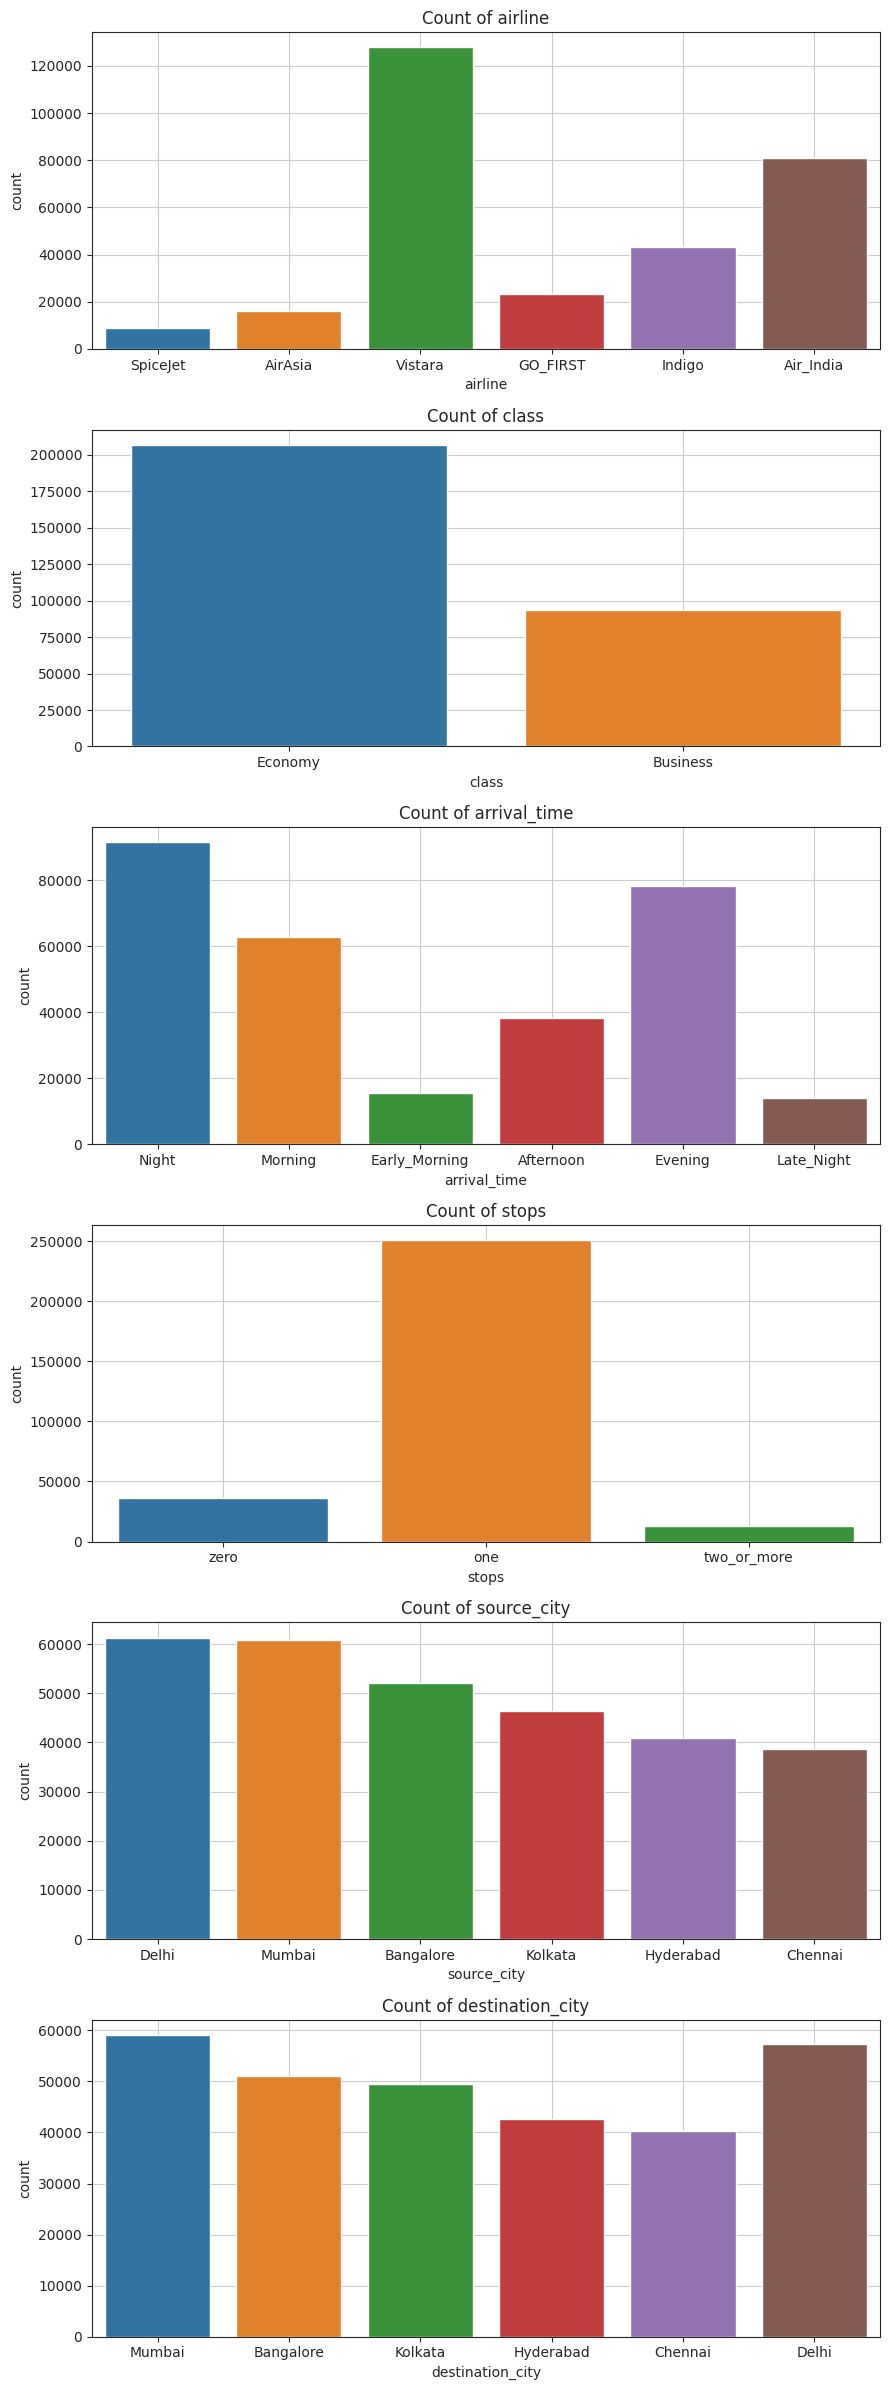

In [25]:
Ccol =['airline', 'class', 'arrival_time', 'stops', 'source_city', 'destination_city']
fig, axes = plt.subplots(nrows=len(Ccol),figsize=(9,4*len(Ccol)))
plt.subplots_adjust(hspace=0.25)
for i, col in enumerate(Ccol):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}') 
    axes[i].grid(True)
plt.tight_layout()
plt.show() 

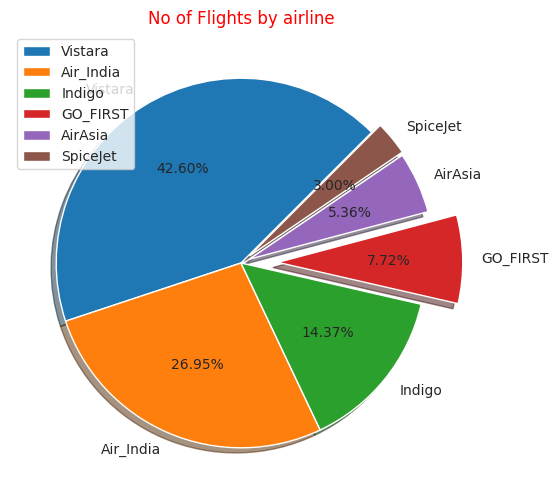

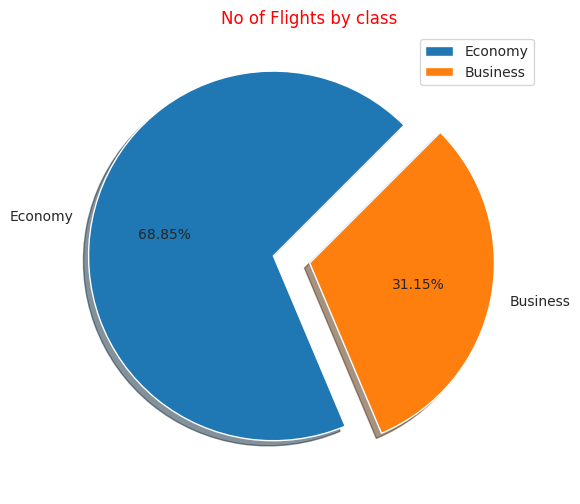

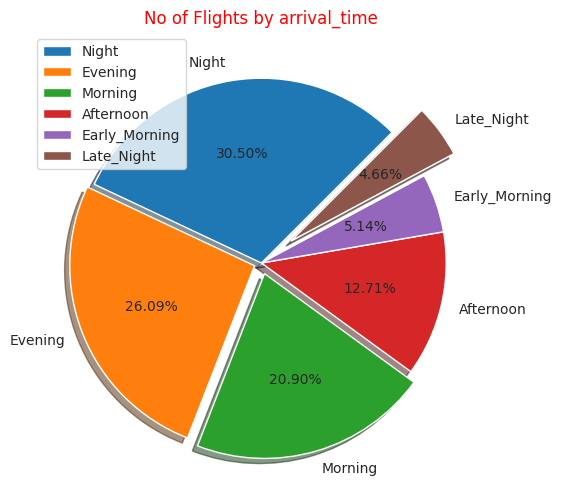

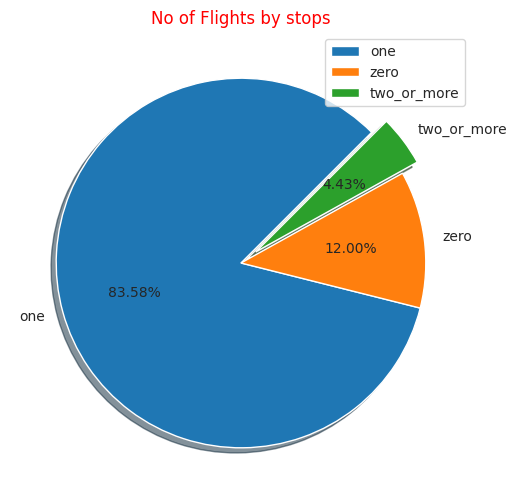

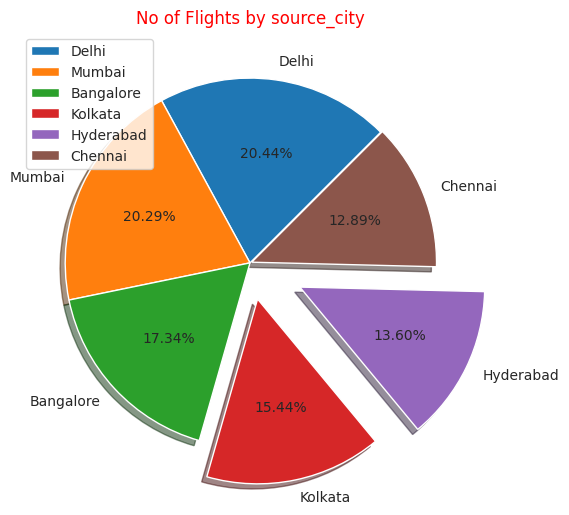

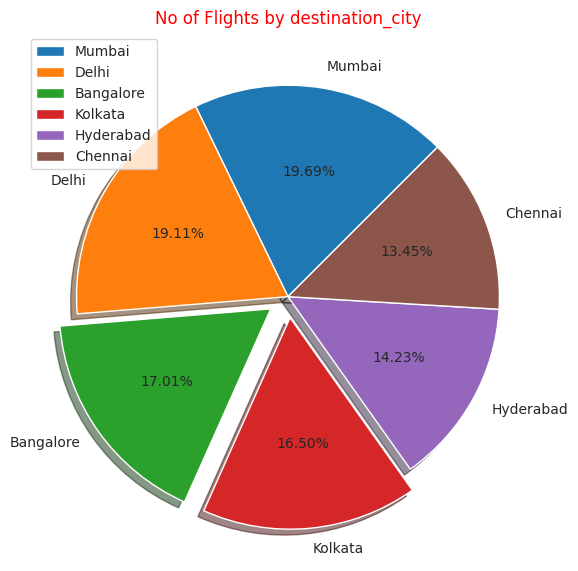

In [26]:
list1=['airline','class','arrival_time','stops','source_city','destination_city']
my_explode=[[0,0,0,.2,0.05,0.06],[.2,0],[0,.04,.06,0,0,.2],[0,0,.1],[0,0,0,.2,.3,.01],[0,0,.1,.1,0,0]]
for i, col in enumerate(list1):
    counts = df[col].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index,autopct='%1.2f%%',startangle=45,shadow=True,explode=my_explode[i])
    plt.title(f'No of Flights by {col}',color='red')
    plt.legend(loc='best')
    
plt.tight_layout()
plt.show()

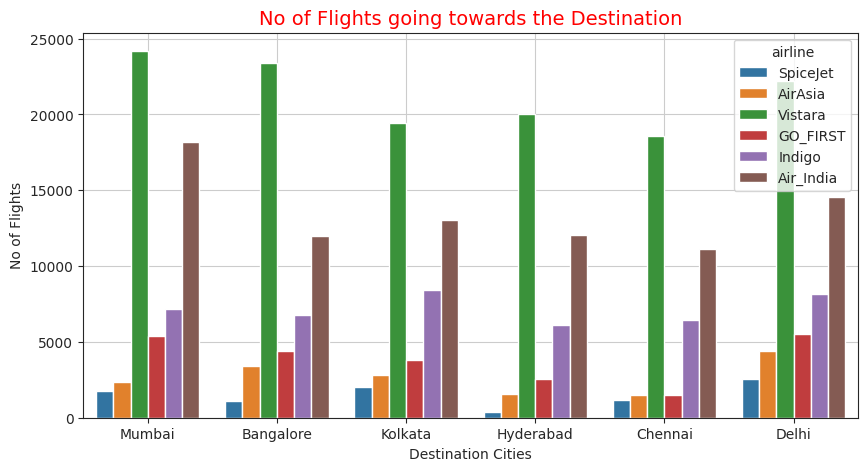

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='destination_city',hue='airline')
plt.title('No of Flights going towards the Destination',fontsize=14,color='red')
plt.xlabel('Destination Cities')
plt.ylabel('No of Flights')
plt.grid(True)

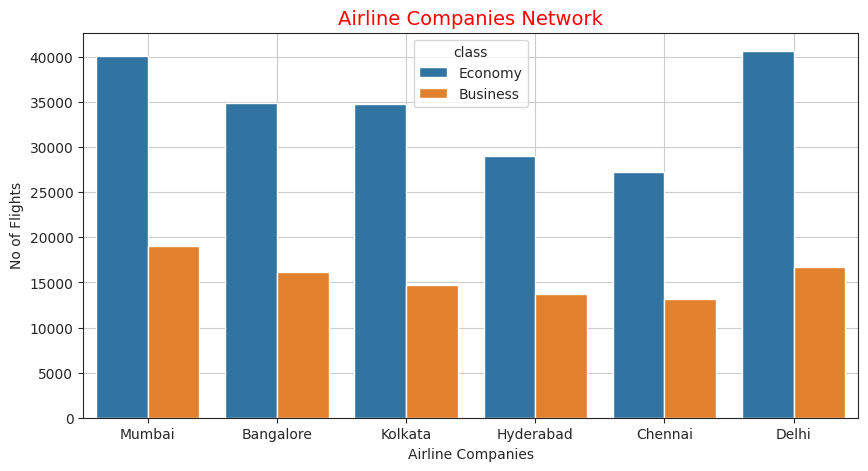

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='destination_city',hue='class')
plt.title('Airline Companies Network',fontsize=14,color='red')
plt.xlabel('Airline Companies')
plt.ylabel('No of Flights')
plt.grid(True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  object 
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 22.9+ MB


In [30]:
df1= df.sample(110000)
df1.shape

(110000, 10)

In [31]:
X = df1.drop(columns=['price'])
y = df1['price']
print(X.shape)
print(y.shape)

(110000, 9)
(110000,)


In [32]:
from sklearn.preprocessing import OneHotEncoder
OE=OneHotEncoder(sparse_output=False)
cat_col = df.select_dtypes(include=['O']).columns.tolist()
cat_col

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'days_left']

In [33]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import PowerTransformer,OneHotEncoder,OrdinalEncoder

In [34]:
Pipeline_num = Pipeline(
steps=[('BoxCox', PowerTransformer(method='box-cox',standardize=True))])

Pipeline_cat = Pipeline(
steps=[('Union',
        FeatureUnion(
            transformer_list=[('Nominal',
                                ColumnTransformer([('OneHot',
                                                    OneHotEncoder(sparse_output=False,handle_unknown='ignore'),
                                                    ['airline','source_city','destination_city'])],remainder='drop')),
                                       
                              ('Ordinal',
                               ColumnTransformer([('LabelEncoder',
                                                    OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),
                                                    ['departure_time','stops','arrival_time','class','days_left'])],remainder='drop'))]))])
CT = make_column_transformer(
(Pipeline_num,['duration']),
(Pipeline_cat,['airline','source_city','departure_time','stops','arrival_time','destination_city','class','days_left']),
remainder='drop')
CT

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('BoxCox',
                                                  PowerTransformer(method='box-cox'))]),
                                 ['duration']),
                                ('pipeline-2',
                                 Pipeline(steps=[('Union',
                                                  FeatureUnion(transformer_list=[('Nominal',
                                                                                  ColumnTransformer(transformers=[('OneHot',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse_output=False),
                                                                                                                   ['airline',
                                                                                                                    'source_city',
                                                                                                                    'destination_city'])])),
                                                                                 ('Ordinal',
                                                                                  ColumnTransformer(transformers=[('LabelEncoder',
                                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                  unknown_value=-1),
                                                                                                                   ['departure_time',
                                                                                                                    'stops',
                                                                                                                    'arrival_time',
                                                                                                                    'class',
                                                                                                                    'days_left'])]))]))]),
                                 ['airline', 'source_city', 'departure_time',
                                  'stops', 'arrival_time', 'destination_city',
                                  'class', 'days_left'])])

In [35]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=13)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(88000, 9)
(22000, 9)
(88000,)
(22000,)


**Applying Supervised learning MLs**

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [37]:
alpha_range = {'model__alpha': [0.001,0.01,0.1,1,10,100]}

In [38]:
models= {'Linear_Regression':Pipeline([('transformer',CT),('model',LinearRegression())]),
         'Ridge_Regressor':Pipeline([('transformer',CT),('model',Ridge(alpha=10, random_state=13,solver='svd'))]),
         'Lasso_Regressor':Pipeline([('transformer',CT),('model',Lasso(alpha=5, random_state=13,selection='random'))]),
         'DecisionTreeRegressor':Pipeline([('transformer',CT),('model',DecisionTreeRegressor(criterion='absolute_error',))]),
         'GridSearchCV':GridSearchCV(estimator=Pipeline([('transformer',CT),('model',Ridge(random_state=13))]),param_grid=alpha_range,cv=5,),
         'RandomizedSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',Ridge(random_state=13))]),param_distributions=alpha_range,cv=5)
        }
# 'RandomForestRegressor':Pipeline([('model',CT),('model4',RandomForestRegressor(n_estimators=150,criterion='absolute_error',random_state=42))]),

In [39]:
models.items()

dict_items([('Linear_Regression', Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('BoxCox',
                                                                   PowerTransformer(method='box-cox'))]),
                                                  ['duration']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Union',
                                                                   FeatureUnion(transformer_list=[('Nominal',
                                                                                                   ColumnTransformer(transformers=[('OneHot',
                                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                           

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
for model_name,model in models.items():
    print(f'Fitting Model: {model_name}')
    
    if isinstance(model,(GridSearchCV,RandomizedSearchCV)):
        model.fit(Xtrain,ytrain)
        best_model = model.best_estimator_
        print(f"Best parameters for {model_name}: {model.best_params_}")
    else :
        best_model=model
        best_model.fit(Xtrain,ytrain)
    
    best_model.fit(Xtrain,ytrain)
    Y_pred = best_model.predict(Xtest)
    difference_table = pd.DataFrame(np.c_[ytest,Y_pred],columns=['Actual','Predicted'])
    print(f'R2 Score of {model_name} is : {r2_score(ytest,Y_pred)}')
    print(f'Mean Absolute Error of {model_name} is : {mean_absolute_error(ytest,Y_pred)}')
    print(f'Mean Absolute Percentage Error of {model_name} is : {mean_absolute_percentage_error(ytest,Y_pred)}')
    print(f'Mean Squared Error of {model_name} is : {mean_squared_error(ytest,Y_pred)}')
    print(f'Root Mean Squared Error of {model_name} is : {np.sqrt(mean_squared_error(ytest,Y_pred))}')
    difference_table['Difference'] = abs(difference_table['Actual']-difference_table['Predicted'])
    print(difference_table)
    print('****'*12)
    print('****'*12)
    print('    ')

Fitting Model: Linear_Regression
R2 Score of Linear_Regression is : 0.9083657197142189
Mean Absolute Error of Linear_Regression is : 4622.852118554147
Mean Absolute Percentage Error of Linear_Regression is : 0.4413059264133992
Mean Squared Error of Linear_Regression is : 47468231.215865634
Root Mean Squared Error of Linear_Regression is : 6889.719240714068
        Actual     Predicted    Difference
0      12401.0  13398.607166    997.607166
1      51707.0  51178.276045    528.723955
2      64173.0  52516.474691  11656.525309
3       4414.0   9374.385136   4960.385136
4      53209.0  55845.702896   2636.702896
...        ...           ...           ...
21995   3916.0   4426.342728    510.342728
21996  57353.0  55597.933584   1755.066416
21997  60508.0  53505.661755   7002.338245
21998  57920.0  56585.261169   1334.738831
21999  25809.0  10443.474456  15365.525544

[22000 rows x 3 columns]
************************************************
************************************************
 

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for RandomizedSCV: {'model__alpha': 1}
R2 Score of RandomizedSCV is : 0.9083659264372861
Mean Absolute Error of RandomizedSCV is : 4622.8773323545975
Mean Absolute Percentage Error of RandomizedSCV is : 0.4413106039453528
Mean Squared Error of RandomizedSCV is : 47468124.12954027
Root Mean Squared Error of RandomizedSCV is : 6889.711469251834
        Actual     Predicted    Difference
0      12401.0  13398.365153    997.365153
1      51707.0  51176.609341    530.390659
2      64173.0  52514.886375  11658.113625
3       4414.0   9375.848575   4961.848575
4      53209.0  55844.004555   2635.004555
...        ...           ...           ...
21995   3916.0   4426.363939    510.363939
21996  57353.0  55596.432342   1756.567658
21997  60508.0  53503.995568   7004.004432
21998  57920.0  56583.704717   1336.295283
21999  25809.0  10444.578807  15364.421193

[22000 rows x 3 columns]
************************************************
************************************************

**Using Neural Network**

In [41]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [42]:
transformed_data = CT.fit_transform(df)
X = transformed_data
y = df.price
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.22,random_state=42)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(234119, 24)
(234119,)
(66034, 24)
(66034,)


In [43]:
Xtrain.shape[1]

24

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape= (Xtrain.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(850,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1)])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 850)               4

In [46]:
opt = model.compile(optimizer='adam',
                   loss='mse',
                   )
ANN_regressor = model.fit(X, y, validation_data=(Xtest,ytest), epochs=50, batch_size=50)

Epoch 1/50
6004/6004 [==============================] - 27s 4ms/step - loss: 51935108.0000 - val_loss: 22284026.0000
Epoch 2/50
6004/6004 [==============================] - 23s 4ms/step - loss: 27061924.0000 - val_loss: 21182424.0000
Epoch 3/50
6004/6004 [==============================] - 23s 4ms/step - loss: 25314364.0000 - val_loss: 20166132.0000
Epoch 4/50
6004/6004 [==============================] - 23s 4ms/step - loss: 24384884.0000 - val_loss: 25692588.0000
Epoch 5/50
6004/6004 [==============================] - 23s 4ms/step - loss: 23862926.0000 - val_loss: 18841650.0000
Epoch 6/50
6004/6004 [==============================] - 23s 4ms/step - loss: 23188326.0000 - val_loss: 20063054.0000
Epoch 7/50
6004/6004 [==============================] - 23s 4ms/step - loss: 22489900.0000 - val_loss: 21459048.0000
Epoch 8/50
6004/6004 [==============================] - 23s 4ms/step - loss: 22283272.0000 - val_loss: 18689818.0000
Epoch 9/50
6004/6004 [==============================] - 23s 4ms/

In [47]:
print("Train Score",model.evaluate(Xtrain,ytrain))
print("Test Score",model.evaluate(Xtest,ytest))

7317/7317 [==============================] - 14s 2ms/step - loss: 15134074.0000
Train Score 15134074.0
2064/2064 [==============================] - 4s 2ms/step - loss: 15405713.0000
Test Score 15405713.0


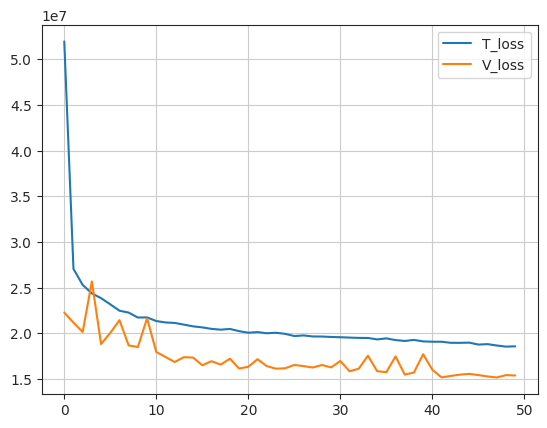

In [48]:
plt.plot(ANN_regressor.history['loss'], label='T_loss')
plt.plot(ANN_regressor.history['val_loss'], label='V_loss')
plt.legend()
plt.grid(True)